# TP 1 : Unsupervised learning

Importing the python libraries for lab :
- Numppy for working with our array
- pylab or matplotlib for plotting our data
- scipy to do more advances operations on our array

In [195]:
import numpy as np
import pylab as pl
import scipy as sp

## 1.3.1 Loading the data for both DataSets :

- digits.tmz
- temper.npz

- The three matrices of the temper dataset : data, villes and varname are stored in x1
- The two matrices of the digits dataset : x and xt are stored in x2
- The two matrices of the digits dataset : y and yt are stored in y2

For the x2 matrices we do a simple pre-processing that will scale the values between 0 and 1 by dividing by 255 (range of pixels values) to have a better computation afterwards because computers work better with scaled values espacially between 0 and 1.

In [196]:
x1 = np.load('temper.npz')

data_digits = np.load('digits.npz')
x2 = data_digits['x'] / 255.0
y2 = data_digits['y']

x2 = np.concatenate((x2, data_digits['xt'] / 255.0))
y2 = np.concatenate((y2, data_digits['yt']))

## 1.3.2 Quick look at the data

Here, we only have to compute the twelwe first columns of our matrix data where are stored the tempature data for each month.
We plug also the name of months with the matrix varname and plot this using the histogram method called bar that allow us to vizualise quickly what the data looks like.
Therefore we can instantly see the logic behind the data where the summer have much higher tempeature means than the winter.

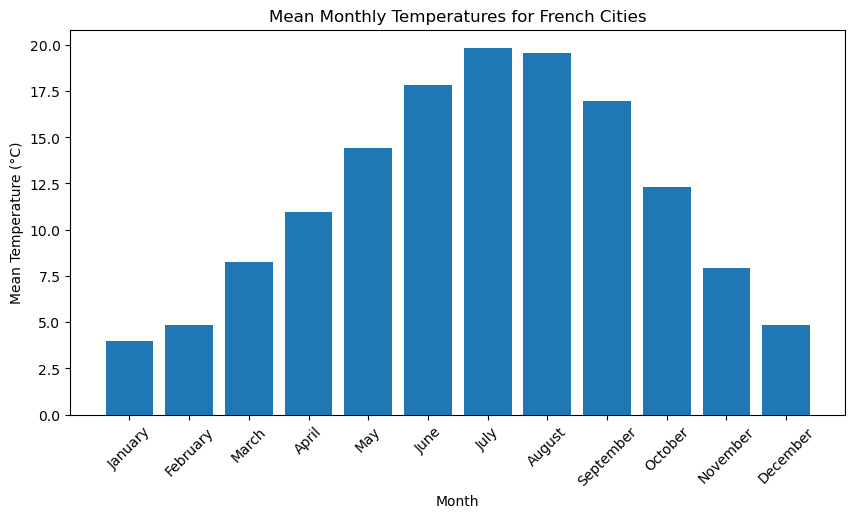

In [197]:
mean_temperatures = np.mean(x1['data'][:, :12], axis=0)
months = x1['varname'][:12]

pl.figure(figsize=(10, 5))
pl.bar(months, mean_temperatures)
pl.title('Mean Monthly Temperatures for French Cities')
pl.xlabel('Month')
pl.ylabel('Mean Temperature (°C)')
pl.xticks(rotation=45)
pl.show()

For plotting the images of our digits dataset, we have to use another method wich is 'pl.imshow'
First, we reshape the images, then we create a grid where we will output the images with a loop.
We match the images in the x2 matrix with y2 corresponding labels.

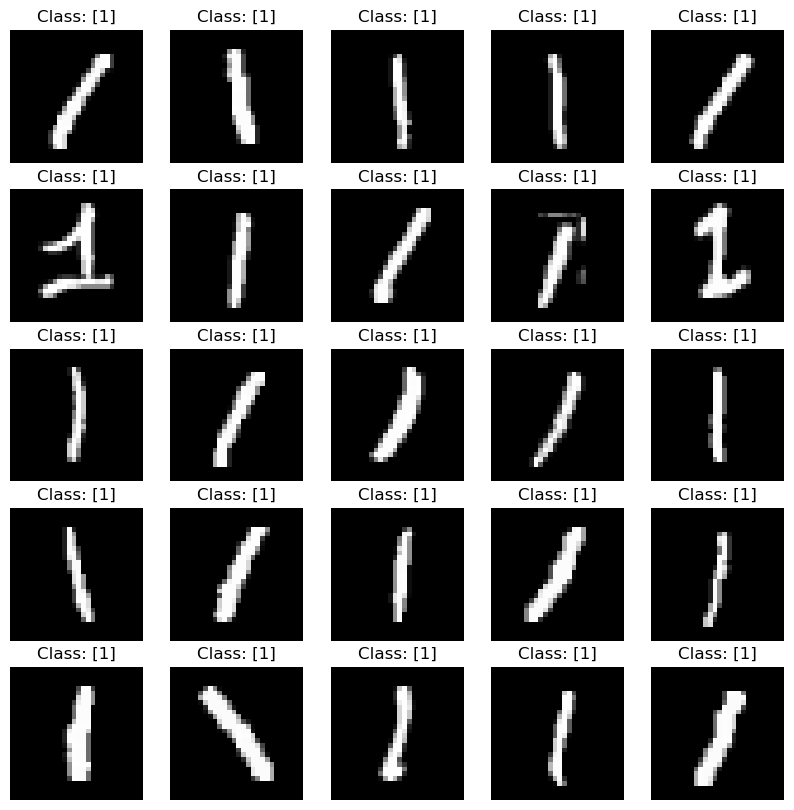

In [198]:
# Reshape the data into 28x28 images
x2_images = x2.reshape(-1, 28, 28)

# Create a grid of image subplots
pl.figure(figsize=(10, 10))
for i in range(25):
    pl.subplot(5, 5, i + 1)
    pl.imshow(x2_images[i], cmap='gray')
    pl.title(f"Class: {y2[i]}")
    pl.axis('off')

pl.show()

## 1.3.3 (Bonus) Reproducing the figures of the TP

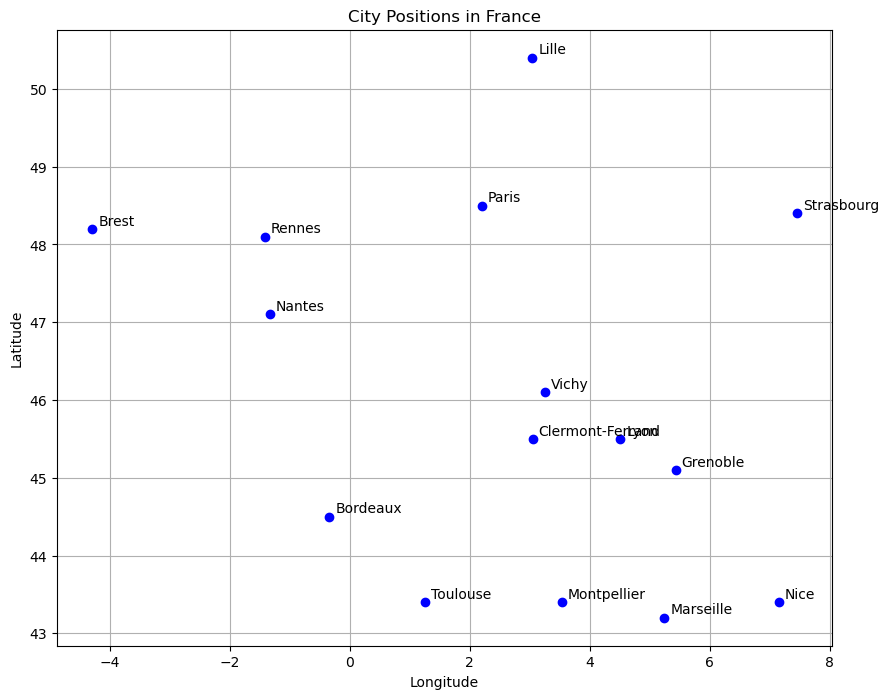

In [199]:
villes = x1['villes']  # List of city names
latitudes_longitudes = x1['data'][:, -2:]  # Latitude and longitude data

# Create a scatter plot of city positions with lighter blue points
pl.figure(figsize=(10, 8))
pl.scatter(latitudes_longitudes[:, 1], latitudes_longitudes[:, 0], marker='o', color='blue')

# Add city names close to the points with smaller font size
for i, ville in enumerate(villes):
    pl.annotate(ville, (latitudes_longitudes[i, 1] + 0.1, latitudes_longitudes[i, 0] + 0.05), fontsize=10)

pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title('City Positions in France')
pl.grid(True)
pl.show()

This visual representation will be very much adapted to test our temperatures results because we can easily see if it will make sense or not.

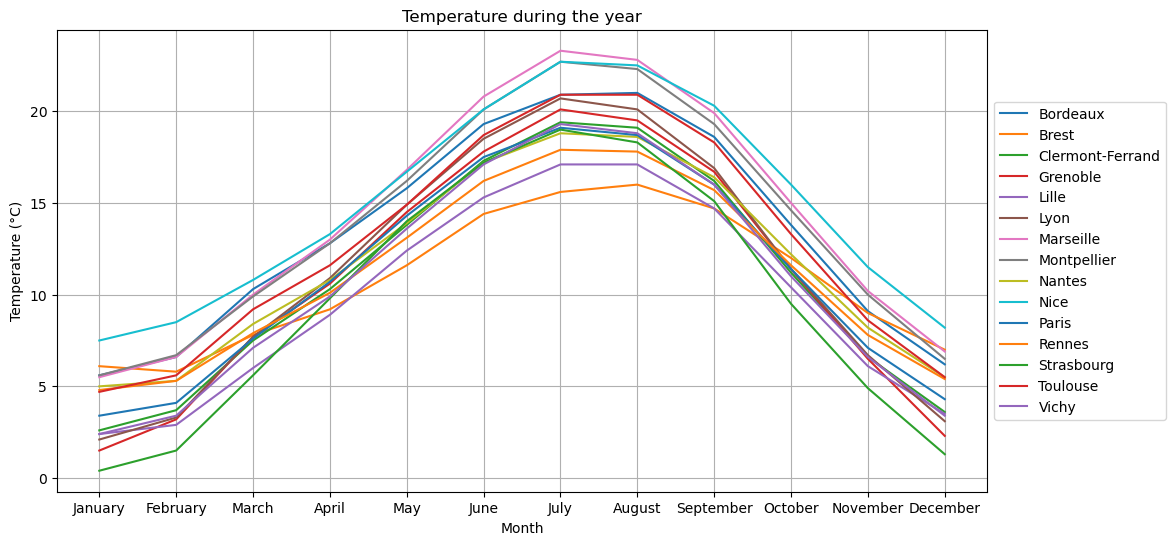

In [200]:
# create a graph with curves for each cities
pl.figure(figsize=(12, 6))
data_temperatures = x1['data'][:, :12]


for i, ville in enumerate(villes):
    pl.plot(months,data_temperatures[i], label=ville)

pl.xlabel('Month')
pl.ylabel('Temperature (°C)')
pl.title('Temperature during the year')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.grid(True)
pl.show()

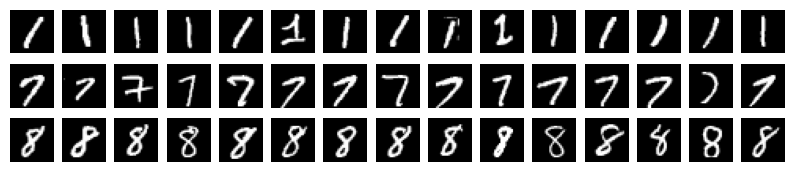

In [201]:
# Selecting the indices of the first 15 labels for each class (1, 7, 8)
class_1_indices = np.where(y2 == 1)[0][:15]
class_7_indices = np.where(y2 == 7)[0][:15]
class_8_indices = np.where(y2 == 8)[0][:15]

# Create a figure with three rows
pl.figure(figsize=(10, 2))

# plot the first 15 images of class 1
for i, idx in enumerate(class_1_indices):
    pl.subplot(3, 15, i + 1)
    pl.imshow(x2[idx].reshape(28, 28), cmap='gray')
    pl.axis('off')

# plot the first 15 images of class 7
for i, idx in enumerate(class_7_indices):
    pl.subplot(3, 15, 15 + i + 1)
    pl.imshow(x2[idx].reshape(28, 28), cmap='gray')
    pl.axis('off')

# plot the first 15 images of class 8
for i, idx in enumerate(class_8_indices):
    pl.subplot(3, 15, 30 + i + 1)
    pl.imshow(x2[idx].reshape(28, 28), cmap='gray')
    pl.axis('off')

pl.show()

## Clustering

For clustering we will use the sklearn libraries for ML.

First, we'll look at the temper dataset and then the digits one.

## Perform K-Means for K=3

After fitting all of our samples in the model, we can get the values of our clusters centroids and estimated classes with sklearn's "_" parameters.

Temper
Cluster Centroids temper:
[[ 2.11428571  3.15714286  7.02857143 10.15714286 13.92857143 17.24285714
  19.24285714 18.8        15.94285714 10.9         6.35714286  3.07142857]
 [ 5.3         5.46666667  8.03333333 10.03333333 12.86666667 15.93333333
  17.43333333 17.46666667 15.6        11.93333333  8.33333333  5.96666667]
 [ 5.78        6.8        10.04       12.7        16.08       19.8
  22.1        21.9        19.28       14.54        9.88        6.66      ]]

Estimated Classes for All Samples temper:
[2 1 0 0 0 0 2 2 1 2 0 1 0 2 0]


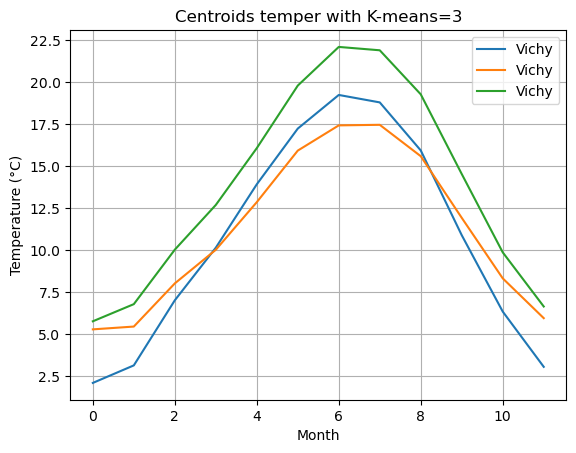

In [202]:

from sklearn.cluster import KMeans

# K-means clustering with K=3
kmeans_temper = KMeans(n_clusters=3, random_state=0)
kmeans_temper.fit(data_temperatures)

# Get cluster centroids and estimated classes
cluster_centroids_temper = kmeans_temper.cluster_centers_
estimated_classes_temper = kmeans_temper.labels_

# Access to the cluster centroids and estimated classes :
print("Temper")
print("Cluster Centroids temper:")
print(cluster_centroids_temper)
print("\nEstimated Classes for All Samples temper:")
print(estimated_classes_temper)

#Transpose the cluster of centroids
pl.plot(cluster_centroids_temper.T,label=ville)

pl.title("Centroids temper with K-means=3")
pl.xlabel('Month')
pl.ylabel('Temperature (°C)')
pl.legend()
pl.grid(True)
pl.show()

We note that K-Means identifies three different temperature behaviors within its three clusters.

Interpretation of the clusters:
1 - Cities that are consistently warmer.
2 & 3 - A crossover cluster, where in the first cluster we find cities that are warmer in winter and colder in summer, while in the last one, it is the opposite.

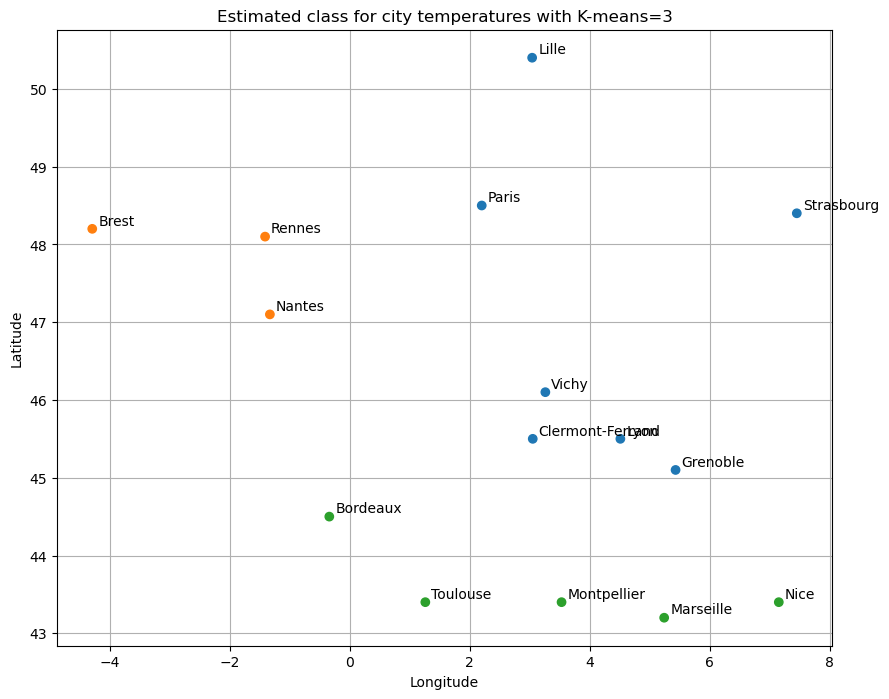

In [203]:
# Create a scatter plot of city positions with lighter blue points
pl.figure(figsize=(10, 8))
pl.scatter(latitudes_longitudes[:, 1], latitudes_longitudes[:, 0], marker='o', c=estimated_classes_temper, cmap="tab10", vmax=9)

# Add city names close to the points with smaller font size
for i, ville in enumerate(villes):
    pl.annotate(ville, (latitudes_longitudes[i, 1] + 0.1, latitudes_longitudes[i, 0] + 0.05), fontsize=10)

pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title('Estimated class for city temperatures with K-means=3')
pl.grid(True)
pl.show()

The K-Means for N=3 makes perfect sense here. Firstly, it divides the south of France where it is always hotter. Then, it separates the western cities from the eastern ones. This map corroborates our previous interpretation well because the west of France (Normandy and Brittany) is known to be more temperature-stable regions. Indeed, it is colder than the rest of France, except in winter when it is warmer than Paris. Consequently, the variance in temperature over the year in that region is smaller.

## K-means = 2 for temperature dataset

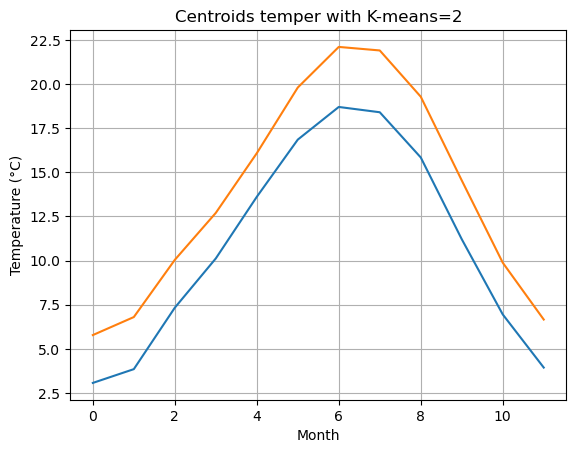

In [204]:
# K-means clustering with K=2
kmeans_temper = KMeans(n_clusters=2, random_state=0)
kmeans_temper.fit(data_temperatures)

# Get cluster centroids and estimated classes
cluster_centroids_temper = kmeans_temper.cluster_centers_
estimated_classes_temper = kmeans_temper.labels_

#Transpose the cluster of centroids
pl.plot(cluster_centroids_temper.T)


pl.title("Centroids temper with K-means=2")
pl.xlabel('Month')
pl.ylabel('Temperature (°C)')
pl.grid(True)
pl.show()

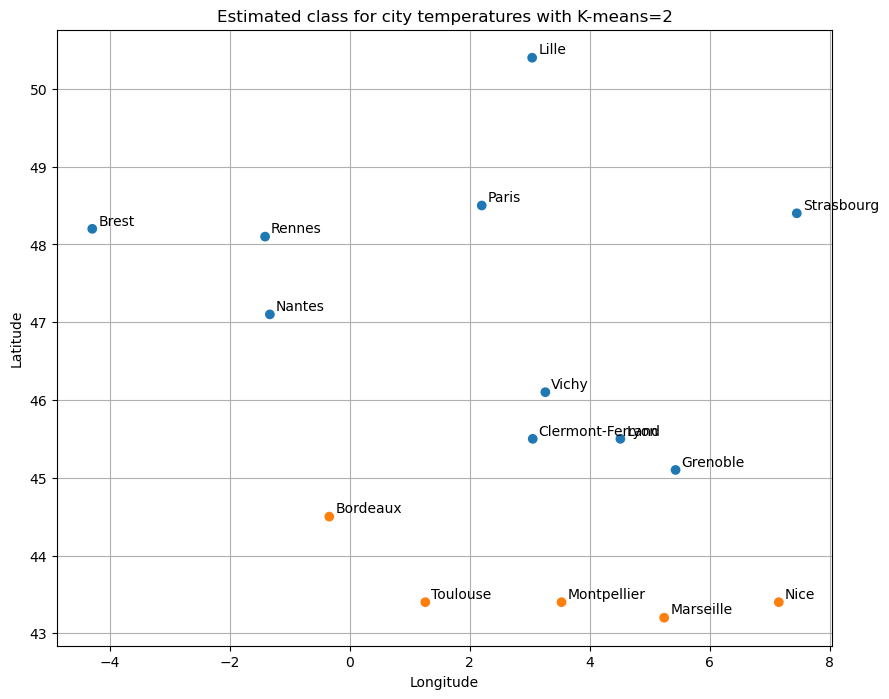

In [205]:
# Create a scatter plot of city positions with lighter blue points
pl.figure(figsize=(10, 8))
pl.scatter(latitudes_longitudes[:, 1], latitudes_longitudes[:, 0], marker='o', c=estimated_classes_temper, cmap="tab10", vmax=9)

# Add city names close to the points with smaller font size
for i, ville in enumerate(villes):
    pl.annotate(ville, (latitudes_longitudes[i, 1] + 0.1, latitudes_longitudes[i, 0] + 0.05), fontsize=10)

pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title('Estimated class for city temperatures with K-means=2')
pl.grid(True)
pl.show()

For K-Means = 2, the result is much less interesting. As expected, the algorithm will clearly separate the southern cities from the rest. There are two clusters where the temperatures show the greatest differences. However, the issue here is that we lose a lot of information for the cities that are not in France. We assume here that they exhibit the "same" behavior.

## K-means = 4 for temperature dataset

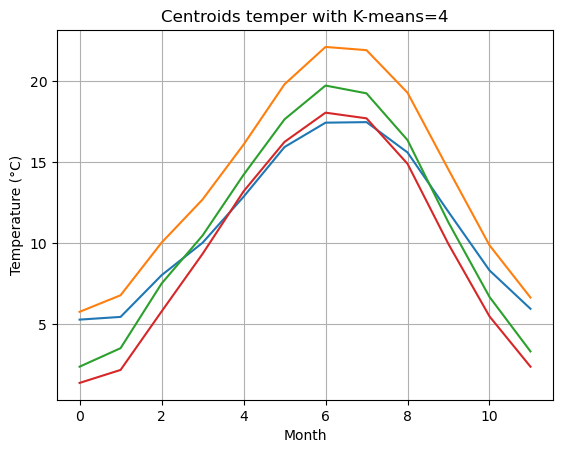

In [206]:
# K-means clustering with K=4
kmeans_temper = KMeans(n_clusters=4, random_state=0)
kmeans_temper.fit(data_temperatures)

# Get cluster centroids and estimated classes
cluster_centroids_temper = kmeans_temper.cluster_centers_
estimated_classes_temper = kmeans_temper.labels_

#Transpose the cluster of centroids
pl.plot(cluster_centroids_temper.T)

pl.title("Centroids temper with K-means=4")
pl.xlabel('Month')
pl.ylabel('Temperature (°C)')
# pl.legend()
pl.grid(True)
pl.show()

For K-Means = 4, the result is quite interesting. It is very similar to K-Means = 3 in terms of cluster behavior but with greater precision. Indeed, the final cluster created could be regarded as a subcluster of the two intersecting curves that we observe for K-Means = 3.

We observe a cluster (in red) where the temperature is consistently colder than elsewhere, except in summer when it can be slightly warmer than another cluster of cities.

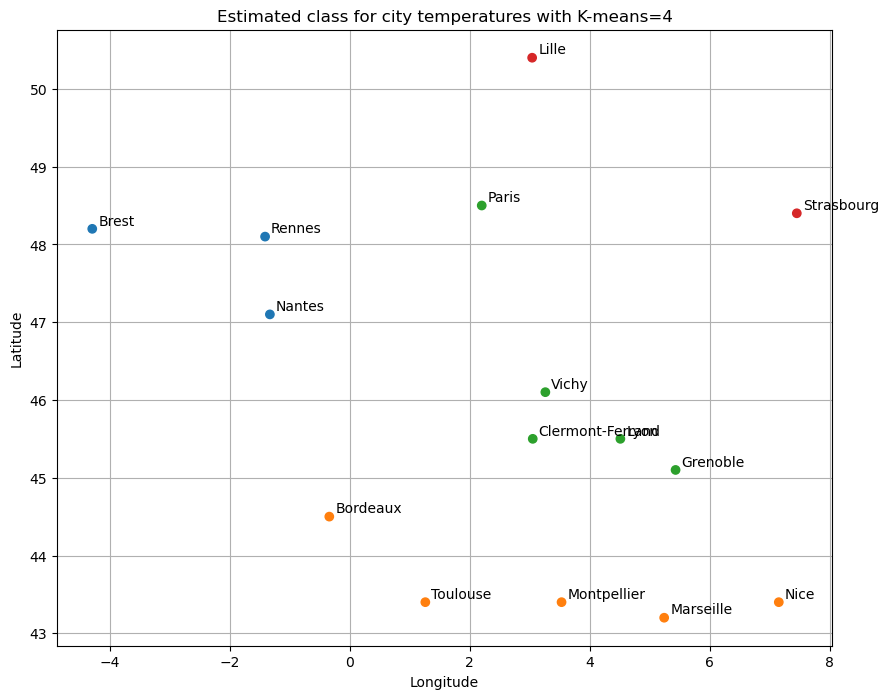

In [207]:
# Create a scatter plot of city positions with lighter blue points
pl.figure(figsize=(10, 8))
pl.scatter(latitudes_longitudes[:, 1], latitudes_longitudes[:, 0], marker='o', c=estimated_classes_temper, cmap="tab10", vmax=9)

# Add city names close to the points with smaller font size
for i, ville in enumerate(villes):
    pl.annotate(ville, (latitudes_longitudes[i, 1] + 0.1, latitudes_longitudes[i, 0] + 0.05), fontsize=10)

pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title('Estimated class for city temperatures with K-means=4')
pl.grid(True)
pl.show()

In this data visualisation, we can clearly see where this subcluster is located. It effectively divides the central and northern regions of France, which makes sense to a native French speaker.

In conclusion, in my opinion, for this dataset, K=3 and K=4 are both reasonable choices. However, since K=4 introduces a "subcluster," K=3 could be considered the better value because it clearly illustrates three distinct temperature behavior patterns for cities.

## Digits Dataset K-means = 3

Digits
Cluster Centroids digits:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Estimated Classes for All Samples digits:
[2 2 2 ... 2 0 0]


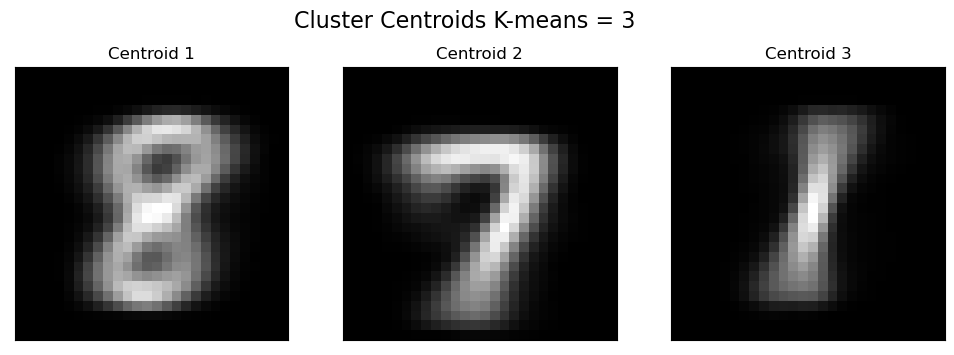

In [208]:

# K-means clustering with K=3

kmeans_digits = KMeans(n_clusters=3, random_state=0)
kmeans_digits.fit(x2)

# Get cluster centroids and estimated classes

cluster_centroids_digits = kmeans_digits.cluster_centers_
estimated_classes_digits = kmeans_digits.labels_

# Access to the cluster centroids and estimated classes :

print("Digits")
print("Cluster Centroids digits:")
print(cluster_centroids_digits)
print("\nEstimated Classes for All Samples digits:")
print(estimated_classes_digits)

# Create a figure with three subplots
fig, axes = pl.subplots(1, 3, figsize=(12, 4))

# Plot each centroid on a separate subplot
for i, centroid in enumerate(cluster_centroids_digits):
    axes[i].imshow(centroid.reshape(28, 28), cmap='gray')
    axes[i].set_xticks(())
    axes[i].set_yticks(())
    axes[i].set_title(f'Centroid {i + 1}')

fig.suptitle('Cluster Centroids K-means = 3', fontsize=16)
pl.show()


Here are the centroids for K-Means = 3. Samples are clustered by class on digits. They may appear like real images for the dataset, but they are not. The centroids are created using new pixel values based on the "superposition" of the actual images from their respective clusters.

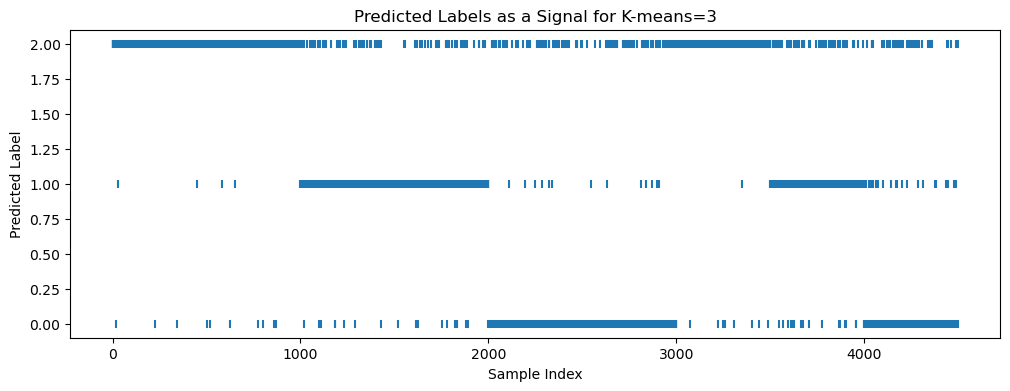

In [209]:
# Create a plot of predicted labels as a signal
pl.figure(figsize=(12, 4))
# pl.plot(estimated_classes_temper, marker='|', linestyle='-', markersize=3)
pl.scatter(range(len(estimated_classes_digits)), estimated_classes_digits, marker='|')
pl.xlabel('Sample Index')
pl.ylabel('Predicted Label')
pl.title('Predicted Labels as a Signal for K-means=3')
pl.show()

From what we can see on the plot :

- In the [0,1000] range, the the number one (class 2) is really well predicted with only a few mistakes.

- In the [1000,2000] range, the number 7 (class 1) to be predicted in often mistaken with the one. Very surprising result because if the one is so well predicted, why would the model make so many mistakes with the 7 by choosing ones?

- In the [2000,3000] range, the number 8 (class 0) is also mistaken a lot with ones. It is very much more surprising than for the range [1000,2000] because the 7 tend to be more visually close from the 1 than the 8.


## Performance of the model

In [210]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, rand_score

# Initialize empty lists to store ARI and RI values
ari_values = []
ri_values = []
cluster_range = range(2, 7)  # Range of cluster values to test

# Flatten the true labels array to 1D
y2 = y2.ravel()

for n_clusters in cluster_range:
    kmeans_digits = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans_digits.fit(x2)

    # Get estimated classes
    estimated_classes_digits = kmeans_digits.labels_

    # Compute ARI and RI
    ari = adjusted_rand_score(y2, estimated_classes_digits)
    ri = rand_score(y2, estimated_classes_digits)

    # Append the ARI and RI values to the lists
    ari_values.append(ari)
    ri_values.append(ri)

print('ARI Values :', ari_values)
print('RI Values :', ri_values)


ARI Values : [0.4213995325649687, 0.7481880864638025, 0.6680520157869276, 0.5939251173076758, 0.4858528451100564]
RI Values : [0.7085167568101554, 0.8876126546639994, 0.860638956805216, 0.8356797312983132, 0.7995752142451409]


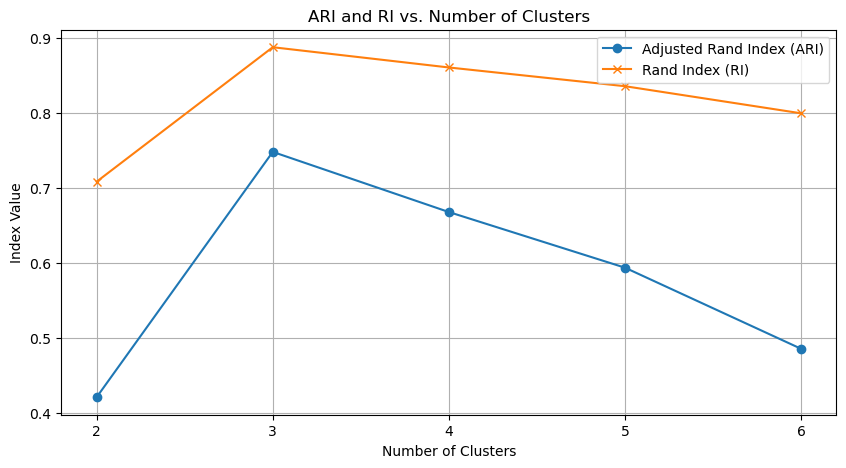

In [211]:
# Create a plot to visualize the ARI and RI values
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, ari_values, marker='o', label='Adjusted Rand Index (ARI)')
plt.plot(cluster_range, ri_values, marker='x', label='Rand Index (RI)')
plt.xlabel('Number of Clusters')
plt.ylabel('Index Value')
plt.title('ARI and RI vs. Number of Clusters')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()

K = 3 leads to the best score, obviously because we have three examples of digits in our dataset. Therefore, the best score must correspond to the K-means algorithm that finds three clusters (1, 7, and 8).

## 3. Density estimation

## Temper Dataset

In [318]:
from sklearn.mixture import GaussianMixture

def gmm_temper_plot(n_components, covariance_type, random_state):

    # Create a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=random_state)

    # Fit the GMM model to the data
    gmm.fit(data_temperatures)

    # Get the estimated covariances for each component
    covariances_temper = gmm.covariances_
    centroids_temper = gmm.means_

    # Predict the component memberships for each sample
    component_memberships_temper = gmm.predict(data_temperatures)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot centroids in the first subplot
    for i in range(len(centroids_temper)):
        axes[0].plot(centroids_temper[i,:], label = f"centroid {i+1}")
    axes[0].legend()
    axes[0].set_xlabel("Months")
    axes[0].set_ylabel("Temperature (°C)")
    axes[0].set_title(f"Centroids with GMM with K={n_components}, cov = {covariance_type}")
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].grid()

    # Plot scatter plot of component memberships in the second subplot
    axes[1].scatter(latitudes_longitudes[:, 1], latitudes_longitudes[:, 0], marker='o', c=component_memberships_temper)

    # Add data labels close to the points with smaller font size
    for i, ville in enumerate(villes):
        axes[1].annotate(ville, (latitudes_longitudes[i, 1] + 0.1, latitudes_longitudes[i, 0] + 0.05), fontsize=10)

    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')
    axes[1].set_title(f'Component Memberships, K={n_components}')
    axes[1].grid()

    plt.tight_layout()
    plt.show()

### K=2

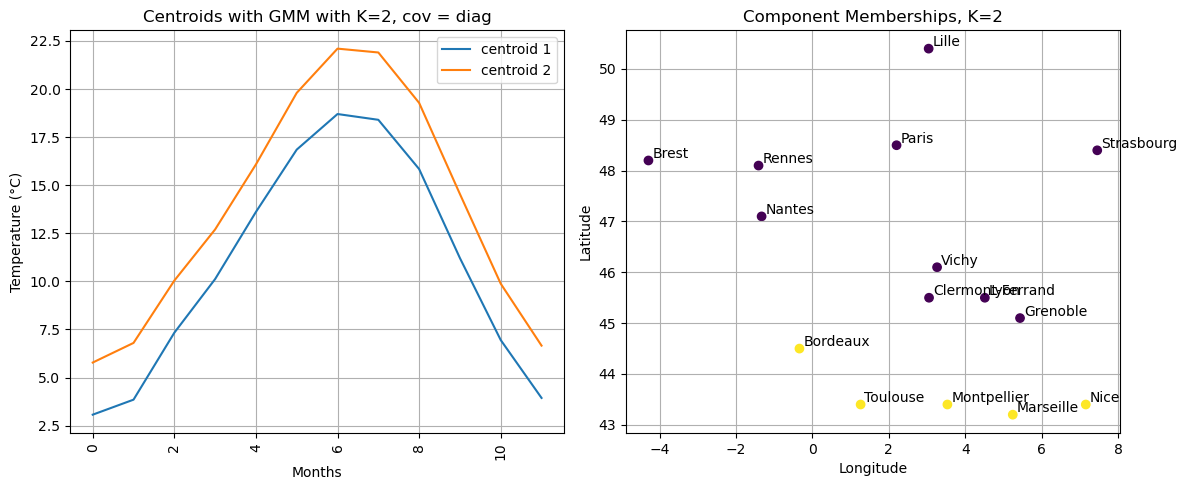

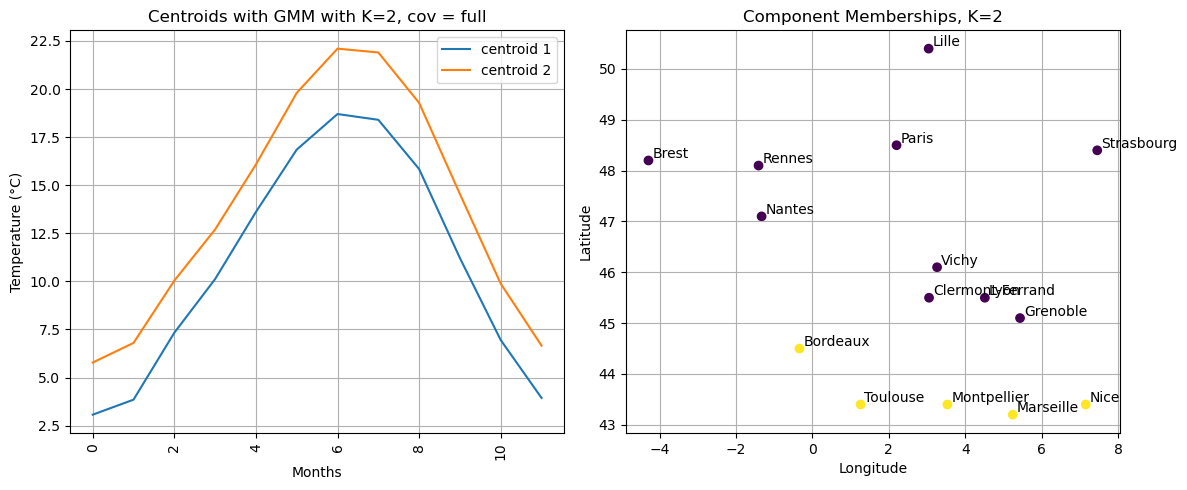

In [319]:
gmm_temper_plot(2,"diag",0)
gmm_temper_plot(2,"full",0)

## K=3

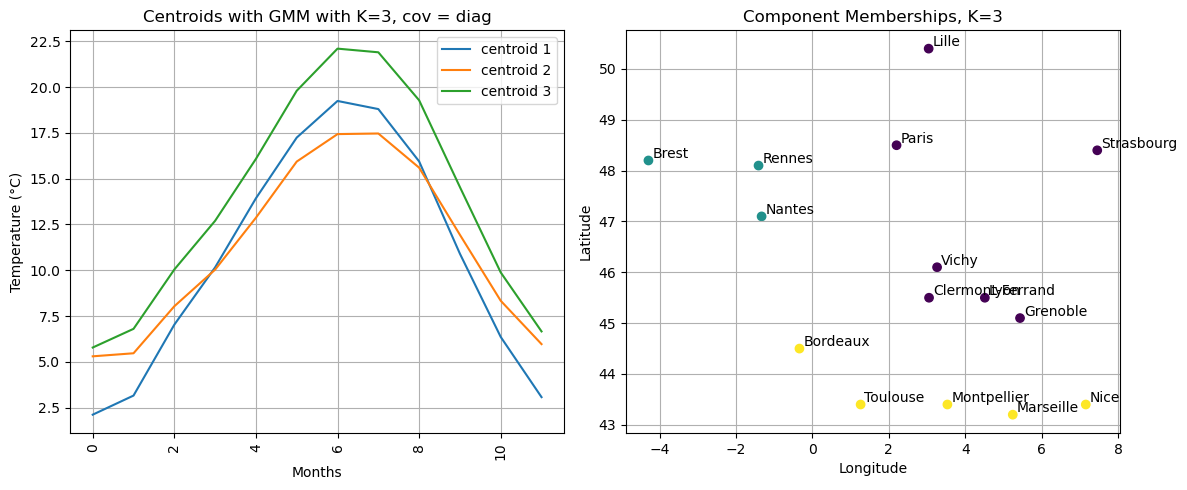

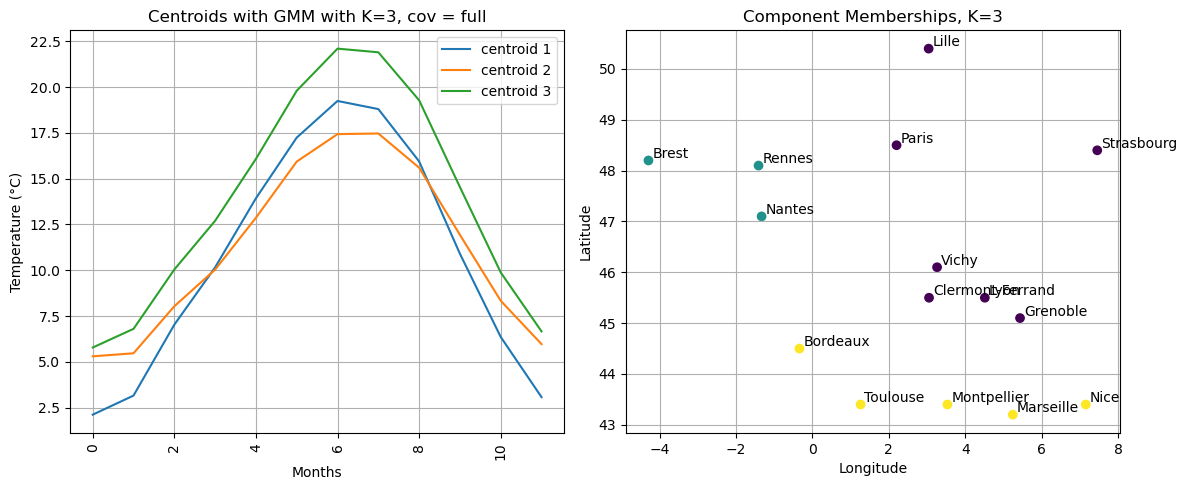

In [320]:
gmm_temper_plot(3,"diag",0)
gmm_temper_plot(3,"full",0)

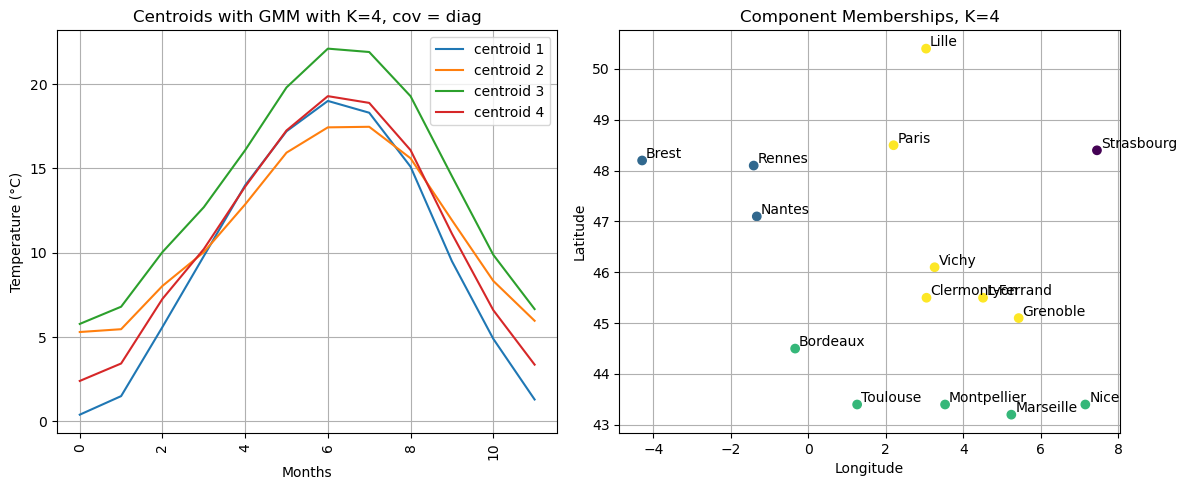

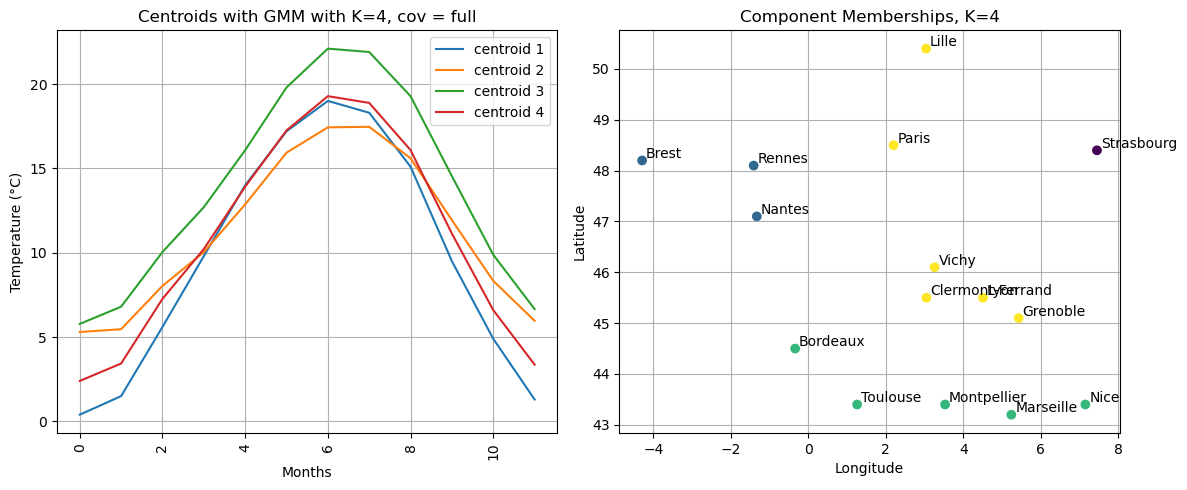

In [321]:
gmm_temper_plot(4,"diag",0)
gmm_temper_plot(4,"full",0)

## Digits Dataset

## K=3

In [278]:
def gmm_digits_plot(n_components, covariance_type, random_state):
    # Create a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=random_state)

    # Fit the GMM model to the data
    gmm.fit(x2)

    # Get the estimated means for each component (centroids)
    centroids = gmm.means_.reshape(-1, 28, 28)

    # Create a figure with subplots
    fig, axes = plt.subplots(1, n_components, figsize=(12, 4))

    # Plot each centroid on a separate subplot
    for i, centroid in enumerate(centroids):
        axes[i].imshow(centroid, cmap='gray')
        axes[i].set_xticks(())
        axes[i].set_yticks(())
        axes[i].set_title(f'Centroid {i + 1}')

    fig.suptitle(f'Cluster Centroids GMM K={n_components} and cov = {covariance_type}', fontsize=16)
    plt.show()

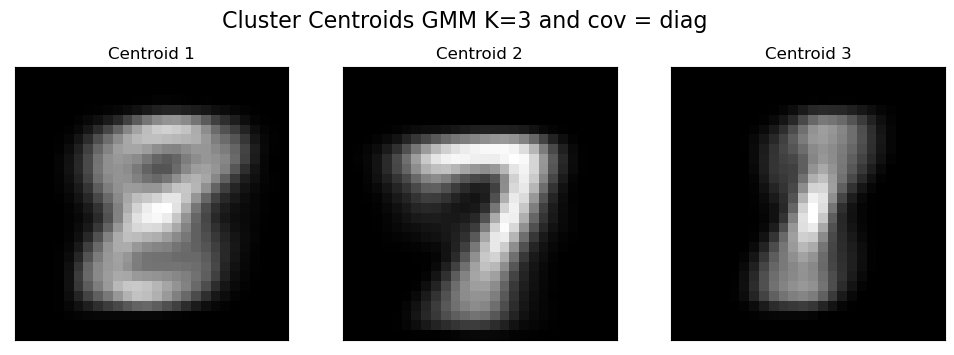

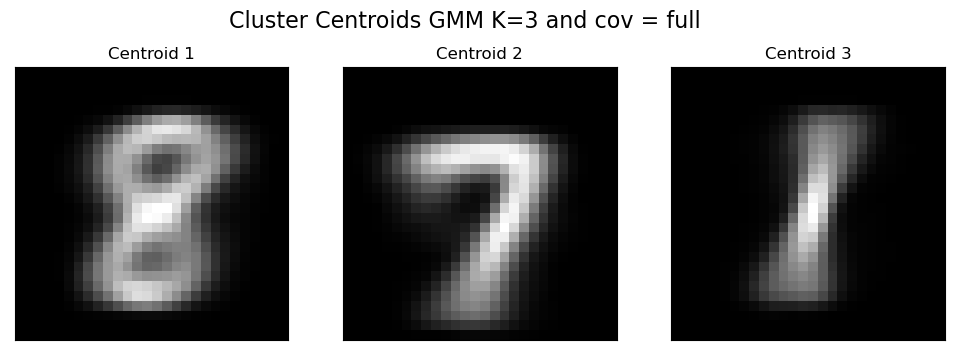

In [279]:
gmm_digits_plot(3,"diag",0)
gmm_digits_plot(3,"full",0)

## K=4

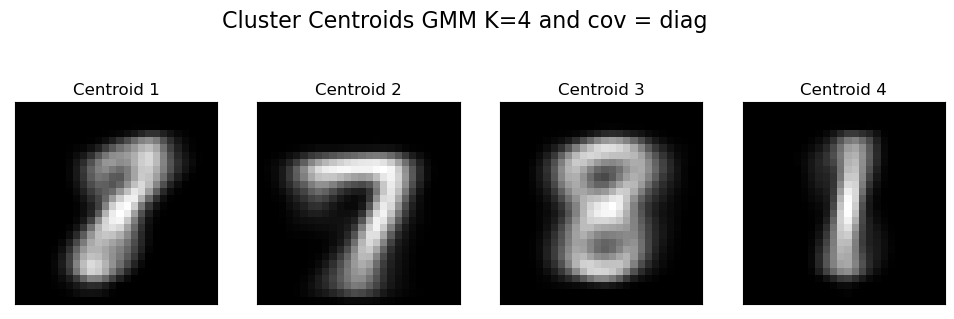

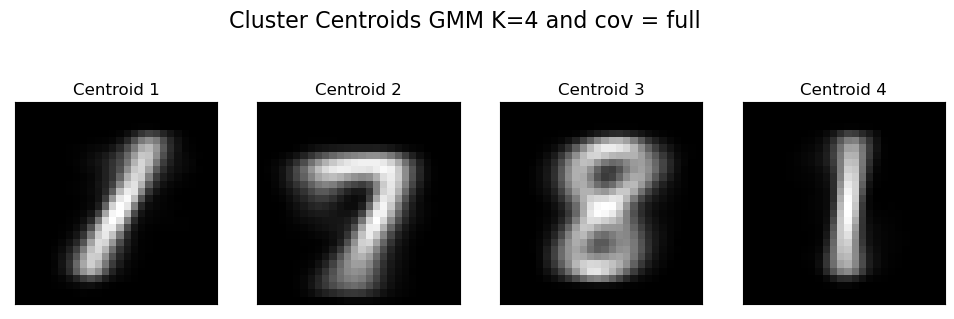

In [322]:
gmm_digits_plot(4,"diag",0)
gmm_digits_plot(4,"full",0)

[-12.43200276 -30.66152562 -12.74903446 -16.06967722 -20.62541895
 -18.44314441 -13.02102214  -9.92980207 -17.20816322 -20.24013377
 -13.12603521 -14.98650196 -23.88056866 -21.49078828 -12.63133605]


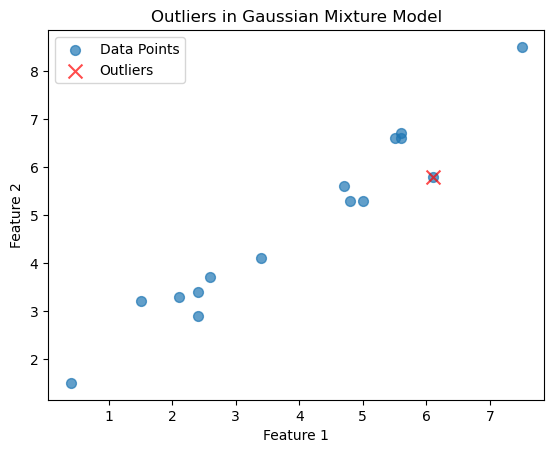

In [327]:
gmm = GaussianMixture(n_components=2, covariance_type="diag", random_state=0)

gmm.fit(data_temperatures)

# Compute log probabilities for each sample
log_probabilities = gmm.score_samples(data_temperatures)
print(log_probabilities)

# Find the indices of the samples with the smallest log probabilities
n_outliers = 1  # Number of outliers to visualize
outlier_indices = np.argsort(log_probabilities)[:n_outliers]

# Extract the outlier samples
outliers = data_temperatures[outlier_indices]

# Plot the original data points
plt.scatter(data_temperatures[:, 0], data_temperatures[:, 1], label='Data Points', s=50, alpha=0.7)

# Plot the outliers in a different color
plt.scatter(outliers[:, 0], outliers[:, 1], marker='x', color='red', label='Outliers', s=100, alpha=0.7)

plt.title('Outliers in Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()